In [78]:
#Build - Train - Test Recurrent Neural Networks
#Using Sine Wave Data with Simple RNN & Keras

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler


In [80]:
# Generate modified sine wave data
x = np.linspace(0, 100, 2048)  # Modified: Increased range and points
y = np.sin(x) + 0.1 * np.sin(5*x)  # Modified: Added harmonic component


In [81]:
print("x shape: ", x.shape)
print("y shape: ", y.shape)

x shape:  (2048,)
y shape:  (2048,)


In [82]:

# Create DataFrame
df = pd.DataFrame(data=y, index=x, columns=['Sine'])


In [83]:
df.head()

,Sine
0.000000,0.000000
0.048852,0.073016
0.097704,0.144481
0.146556,0.212926
0.195408,0.277051


In [84]:

# Split data (30% test)
train_percent = 0.3 # Modified: 70% training data
test_length = int(np.round(len(df)*train_percent)) # Modified: 30% test data
test_start_index = len(df) - test_length # Modified: Start index of test data

In [85]:
# print 
print("Test length: ", test_length)
print("Test start index: ", test_start_index)

Test length:  614
Test start index:  1434


In [86]:
data_train = df.iloc[:test_start_index]
data_test = df.iloc[test_start_index:]

In [87]:
#print data
print("data_train shape: ", data_train.shape)
print("data_test shape: ", data_test.shape)


data_train shape:  (1434, 1)
data_test shape:  (614, 1)


In [88]:

# Normalize data
scaler = MinMaxScaler()
scaler.fit(data_train)


MinMaxScaler()

In [89]:
# Normalize data
normalized_train = scaler.transform(data_train)
normalized_test = scaler.transform(data_test)

In [90]:
# Create TimeseriesGenerator
length = 60  # Modified sequence length
batch_size = 32  # Modified batch size
train_generator = TimeseriesGenerator(
    normalized_train, normalized_train, 
    length=length, batch_size=batch_size
)


In [91]:

# Build model with two layers
n_features = 1
model = Sequential([
    SimpleRNN(128, input_shape=(length, n_features), return_sequences=True),
    SimpleRNN(64),
    Dense(1)
])


C:\Users\babebe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [92]:
# Compile the model
# Loss function: Mean Squared Error
# Note: Why MES? the data is real values/continuous: A regression problem
# Optimizer: Adam

model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Added MAE tracking

# Train the model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_10 (SimpleRNN)       │ (None, 60, 128)        │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,057 (113.50 KB)

 Trainable params: 29,057 (113.50 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:

# Compile and train

history = model.fit(train_generator, epochs=50, verbose=1)


Epoch 1/50
19/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4684 - mae: 0.5019 

C:\Users\babebe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2958 - mae: 0.3684
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0056 - mae: 0.0610
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0034 - mae: 0.0483
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - mae: 0.0276
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.5636e-04 - mae: 0.0252
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.3918e-04 - mae: 0.0211
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.7148e-04 - mae: 0.0222
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0016 - mae: 0.0338
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 - mae: 0.0335
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 - mae: 0.0299
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3050e-04 - mae: 0.0144
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9554e-04 - mae: 0.0147
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━

In [94]:

# Generate predictions
test_predictions = []
first_eval_batch = normalized_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))


In [95]:

# Predict future values
for i in range(len(data_test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

In [96]:
# Transform predictions back to original scale
true_predictions = scaler.inverse_transform(test_predictions)
data_test['Predictions'] = true_predictions


C:\Users\babebe\AppData\Local\Temp\ipykernel_55928\2446744278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Predictions'] = true_predictions


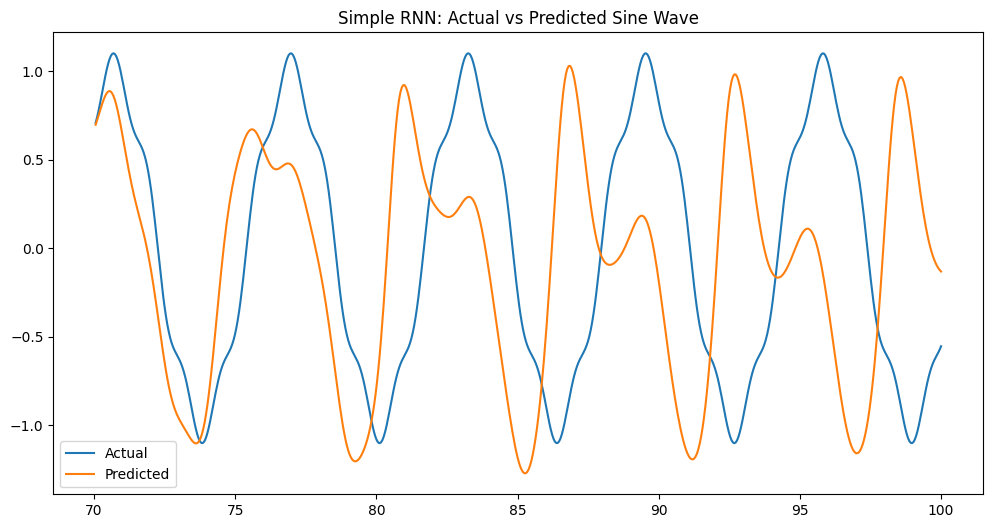

In [97]:
# Create evaluation plots
plt.figure(figsize=(12, 6))
plt.plot(data_test.index, data_test['Sine'], label='Actual')
plt.plot(data_test.index, data_test['Predictions'], label='Predicted')
plt.legend()
plt.title('Simple RNN: Actual vs Predicted Sine Wave')
plt.show()


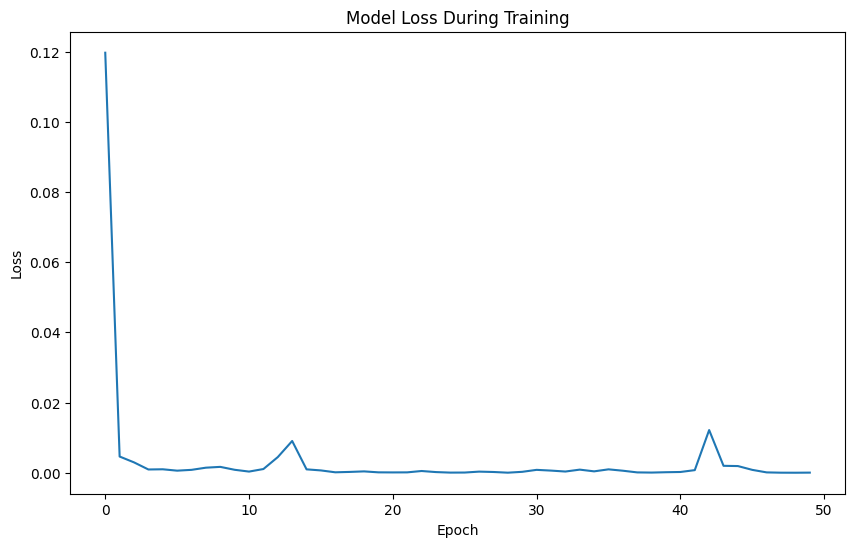

In [98]:

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [99]:

print(f"Final Training Loss: {history.history['loss'][-1]:.6f}")

Final Training Loss: 0.000044
